In [345]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

In [283]:
%matplotlib inline

In [284]:
data = pd.read_csv("atusdata/atussum_2013.dat")

In [285]:
data.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181501,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,0
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,25,0,0,0,0,0,0,0,0,0
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,0


In [286]:
data.columns[:10]

Index(['tucaseid', 'TUFINLWGT', 'TRYHHCHILD', 'TEAGE', 'TESEX', 'PEEDUCA',
       'PTDTRACE', 'PEHSPNON', 'GTMETSTA', 'TELFS'],
      dtype='object')

In [287]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [288]:
adults = data.TEAGE >= 18

In [289]:
adults = data[adults]

In [290]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10953 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 34.6 MB


In [291]:
adults['has_children'] = adults.TRCHILDNUM > 0

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [292]:
adults.ix[adults.has_children==True,'has_children'] = 'Yes'

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [293]:
adults.ix[adults.has_children==False,'has_children'] = 'No'

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [294]:
adults.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,TESEX,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,...,t181599,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107,has_children
0,20130101130004,11899905.662034,12,22,2,40,8,2,1,5,...,0,0,0,0,0,0,0,0,0,Yes
1,20130101130112,4447638.009513,1,39,1,43,1,2,1,1,...,0,0,0,0,0,0,0,0,0,Yes
2,20130101130123,10377056.507734,-1,47,2,40,1,2,1,4,...,0,0,0,0,0,0,0,0,0,No
3,20130101130611,7731257.992805,-1,50,2,40,1,1,1,1,...,0,0,0,0,0,0,0,0,0,No
4,20130101130616,4725269.227067,-1,45,2,40,2,2,1,1,...,0,0,0,0,0,0,0,0,0,No


In [295]:
adults['sex'] = adults.pop('TESEX')

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [296]:
adults.ix[adults.sex == 2,'sex'] = 'F'

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [297]:
adults.ix[adults.sex == 1,'sex'] = 'M'

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [298]:
adults.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,...,t181601,t181801,t189999,t500101,t500103,t500105,t500106,t500107,has_children,sex
0,20130101130004,11899905.662034,12,22,40,8,2,1,5,-1,...,0,0,0,0,0,0,0,0,Yes,F
1,20130101130112,4447638.009513,1,39,43,1,2,1,1,2,...,0,0,0,0,0,0,0,0,Yes,M
2,20130101130123,10377056.507734,-1,47,40,1,2,1,4,-1,...,0,0,0,0,0,0,0,0,No,F
3,20130101130611,7731257.992805,-1,50,40,1,1,1,1,2,...,0,0,0,0,0,0,0,0,No,F
4,20130101130616,4725269.227067,-1,45,40,2,2,1,1,1,...,0,0,0,0,0,0,0,0,No,F


In [300]:
adults['wk_wage'] = adults.pop('TRERNWA')

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [301]:
adults = adults[adults.wk_wage != -1]

In [302]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5986 entries, 1 to 11383
Columns: 414 entries, tucaseid to wk_wage
dtypes: float64(1), int64(411), object(2)
memory usage: 19.0+ MB


In [303]:
adults['wk_wage'] = adults.wk_wage / 100

/Users/briandeshazer/tiy/atus-analysis/.direnv/python-3.4.3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [304]:
adults.head()

,tucaseid,TUFINLWGT,TRYHHCHILD,TEAGE,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,...,t181801,t189999,t500101,t500103,t500105,t500106,t500107,has_children,sex,wk_wage
1,20130101130112,4447638.009513,1,39,43,1,2,1,1,2,...,0,0,0,0,0,0,0,Yes,M,1730.76
3,20130101130611,7731257.992805,-1,50,40,1,1,1,1,2,...,0,0,0,0,0,0,0,No,F,865.38
4,20130101130616,4725269.227067,-1,45,40,2,2,1,1,1,...,0,0,0,0,0,0,0,No,F,230.00
8,20130101130734,1378191.194810,-1,57,34,2,2,1,1,2,...,0,0,0,0,0,0,0,No,F,400.00
10,20130101130740,4538371.462244,0,59,39,2,2,2,1,2,...,0,0,0,0,0,0,0,Yes,F,320.00


In [305]:
adults = adults.rename(columns = {'TEAGE': 'age', 'TUFINLWGT':'weight'})

In [306]:
adults.head()

,tucaseid,weight,TRYHHCHILD,age,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,...,t181801,t189999,t500101,t500103,t500105,t500106,t500107,has_children,sex,wk_wage
1,20130101130112,4447638.009513,1,39,43,1,2,1,1,2,...,0,0,0,0,0,0,0,Yes,M,1730.76
3,20130101130611,7731257.992805,-1,50,40,1,1,1,1,2,...,0,0,0,0,0,0,0,No,F,865.38
4,20130101130616,4725269.227067,-1,45,40,2,2,1,1,1,...,0,0,0,0,0,0,0,No,F,230.00
8,20130101130734,1378191.194810,-1,57,34,2,2,1,1,2,...,0,0,0,0,0,0,0,No,F,400.00
10,20130101130740,4538371.462244,0,59,39,2,2,2,1,2,...,0,0,0,0,0,0,0,Yes,F,320.00


In [313]:
adults.wk_wage.std()

681.46971672201903

##Classes:
* Upper (1%): 6,619.74
* Upper Middle (15%): 1,192.80 
* Lower Middle (32%): 593.89 
* Working (32%): 284.15 
* Lower (14-20%): < 284

In [331]:
adults['status'] = 'Upper'

In [332]:
adults.loc[adults.wk_wage >= 6619.74, 'status'] = 'upper'

In [333]:
adults.loc[(adults.wk_wage < 6619.74) & (adults.wk_wage >= 1192.80), 'status'] = 'upmid'

In [334]:
adults.loc[(adults.wk_wage < 1192.80) & (adults.wk_wage >= 593.89), 'status'] = 'lomid'

In [335]:
adults.loc[(adults.wk_wage < 593.89) & (adults.wk_wage >= 284.15), 'status'] = 'working'

In [336]:
adults.loc[adults.wk_wage < 284.15, 'status'] = 'lower'

In [337]:
adults.head()

,tucaseid,weight,TRYHHCHILD,age,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,...,t189999,t500101,t500103,t500105,t500106,t500107,has_children,sex,wk_wage,status
1,20130101130112,4447638.009513,1,39,43,1,2,1,1,2,...,0,0,0,0,0,0,Yes,M,1730.76,upmid
3,20130101130611,7731257.992805,-1,50,40,1,1,1,1,2,...,0,0,0,0,0,0,No,F,865.38,lomid
4,20130101130616,4725269.227067,-1,45,40,2,2,1,1,1,...,0,0,0,0,0,0,No,F,230.00,lower
8,20130101130734,1378191.194810,-1,57,34,2,2,1,1,2,...,0,0,0,0,0,0,No,F,400.00,working
10,20130101130740,4538371.462244,0,59,39,2,2,2,1,2,...,0,0,0,0,0,0,Yes,F,320.00,working


###RANGE

In [371]:
adults['leisure']=adults.loc[:,'t120101':'t130299'].sum(axis=1)

In [373]:
adults['volunteer']=adults.loc[:,'t150101':'t159999'].sum(axis=1)

In [374]:
adults['religion']=adults.loc[:,'t140101':'t149999'].sum(axis=1)

In [375]:
adults['work']=adults.loc[:,'t050101':'t050399'].sum(axis=1)

In [376]:
adults['timekids']=adults.loc[:,'t030101':'t030399'].sum(axis=1)

In [386]:
adults['sleep']=adults.loc[:,'t010101']

In [492]:
adults['education']=adults.loc[:,'t060101':'t060399'].sum(axis=1)

In [493]:
values_list=['sleep','leisure','volunteer','religion','work','timekids','education']

In [494]:
for col in values_list:
    adults['w' + col] = adults[col] * adults.weight

In [495]:
adults.head()

,tucaseid,weight,TRYHHCHILD,age,PEEDUCA,PTDTRACE,PEHSPNON,GTMETSTA,TELFS,TEMJOT,...,timekids,sleep,wsleep,wleisure,wvolunteer,wreligion,wwork,wtimekids,education,weducation
1,20130101130112,4447638.009513,1,39,43,1,2,1,1,2,...,389,580,2.579630e+09,7.116221e+08,0,0,0.000000e+00,1.730131e+09,0,0.000000e+00
3,20130101130611,7731257.992805,-1,50,40,1,1,1,1,2,...,0,450,3.479066e+09,9.664072e+08,0,0,5.257255e+09,0.000000e+00,0,0.000000e+00
4,20130101130616,4725269.227067,-1,45,40,2,2,1,1,1,...,0,570,2.693403e+09,7.087904e+08,0,0,0.000000e+00,0.000000e+00,510,2.409887e+09
8,20130101130734,1378191.194810,-1,57,34,2,2,1,1,2,...,0,930,1.281718e+09,3.721116e+08,0,0,0.000000e+00,0.000000e+00,0,0.000000e+00
10,20130101130740,4538371.462244,0,59,39,2,2,2,1,2,...,190,210,9.530580e+08,1.420510e+09,0,0,2.450721e+09,8.622906e+08,0,0.000000e+00


In [496]:
adults.status.value_counts().sort

<bound method Series.sort of lomid      2154
upmid      1609
working    1475
lower       748
dtype: int64>

In [498]:
table = adults.pivot_table(index='status',values=['wsleep','wleisure','wvolunteer','wreligion','wwork','wtimekids','weight','weducation'],aggfunc=sum)

In [499]:
table

,weducation,weight,wleisure,wreligion,wsleep,wtimekids,wvolunteer,wwork
status,,,,,,,,
lomid,5.616127e+10,1.685817e+10,3.957616e+12,1.216512e+11,8.320424e+12,4.321863e+11,1.096810e+11,5.714226e+12
lower,2.480482e+11,6.695986e+09,1.814320e+12,4.707646e+10,3.579116e+12,1.271605e+11,5.821403e+10,1.321834e+12
upmid,4.075513e+10,1.171558e+10,2.540249e+12,5.391984e+10,5.683867e+12,3.542535e+11,5.982859e+10,4.146503e+12
working,7.923582e+10,1.307464e+10,3.250197e+12,1.008563e+11,6.684679e+12,2.922426e+11,4.380639e+10,4.188310e+12


In [500]:
avg = table.div(table.weight, axis='index'); avg


,weducation,weight,wleisure,wreligion,wsleep,wtimekids,wvolunteer,wwork
status,,,,,,,,
lomid,3.331397,1,234.759500,7.216154,493.554256,25.636601,6.506099,338.958760
lower,37.044317,1,270.956321,7.030549,534.516652,18.990559,8.693870,197.406952
upmid,3.478711,1,216.826567,4.602404,485.154523,30.237810,5.106754,353.930623
working,6.060267,1,248.587814,7.713887,511.270507,22.351863,3.350485,320.338374


In [501]:
del avg['weight']

In [503]:
avg = avg / 60; avg

,weducation,wleisure,wreligion,wsleep,wtimekids,wvolunteer,wwork
status,,,,,,,
lomid,0.055523,3.912658,0.120269,8.225904,0.427277,0.108435,5.649313
lower,0.617405,4.515939,0.117176,8.908611,0.316509,0.144898,3.290116
upmid,0.057979,3.613776,0.076707,8.085909,0.503963,0.085113,5.898844
working,0.101004,4.143130,0.128565,8.521175,0.372531,0.055841,5.338973


In [526]:
avg['total']= avg.sum(axis=1); avg

,weducation,wleisure,wreligion,wsleep,wtimekids,wvolunteer,wwork,total
status,,,,,,,,
lomid,0.055523,3.912658,0.120269,8.225904,0.427277,0.108435,5.649313,18.499379
lower,0.617405,4.515939,0.117176,8.908611,0.316509,0.144898,3.290116,17.910654
upmid,0.057979,3.613776,0.076707,8.085909,0.503963,0.085113,5.898844,18.322290
working,0.101004,4.143130,0.128565,8.521175,0.372531,0.055841,5.338973,18.661220


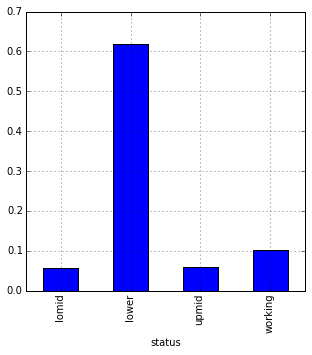

In [537]:
avg.weducation.transpose().plot(kind='bar', figsize=(5,5))

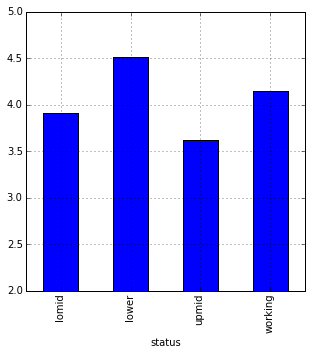

In [534]:
avg.wleisure.transpose().plot(kind='bar', figsize=(5,5), ylim=(2,5))

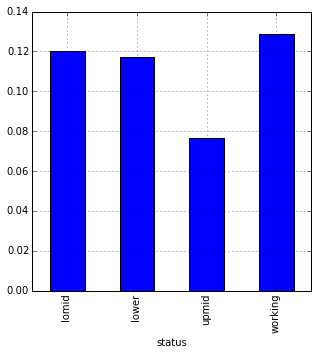

In [535]:
avg.wreligion.transpose().plot(kind='bar', figsize=(5,5))

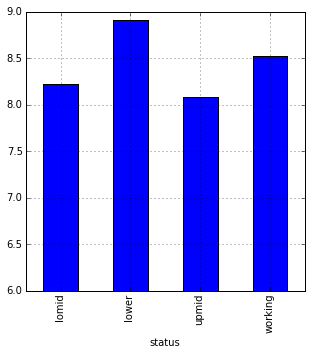

In [536]:
avg.wsleep.transpose().plot(kind='bar', figsize=(5,5), ylim=(6,9))

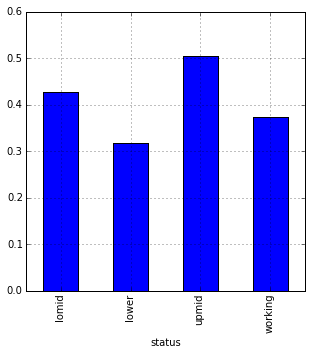

In [539]:
avg.wtimekids.transpose().plot(kind='bar', figsize=(5,5))

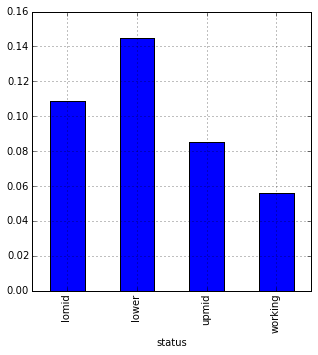

In [540]:
avg.wvolunteer.transpose().plot(kind='bar', figsize=(5,5))

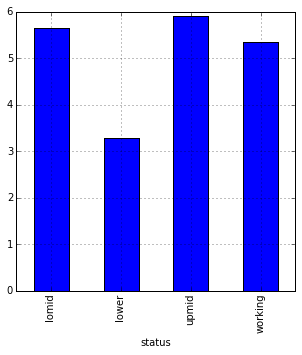

In [541]:
avg.wwork.transpose().plot(kind='bar', figsize=(5,5))